<a href="https://colab.research.google.com/github/vishnurapps/FunctionalAPI-Tensorflow/blob/master/IRIS_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##importing all required modules
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [20]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [0]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30,stratify=Y)

In [22]:
print("train data shape",X_train.shape)
print("test data shape",X_test.shape)

train data shape (120, 4)
test data shape (30, 4)


In [0]:
##convert Y to one hot coding vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
y_train_ohe = encoder.fit_transform(y_train.reshape(-1,1))
y_test_ohe = encoder.transform(y_test.reshape(-1,1))
y_train_ohe = y_train_ohe.toarray()
y_test_ohe = y_test_ohe.toarray()

In [24]:
print("shape of train labels",y_train_ohe.shape)
print("shape of test labels",y_test_ohe.shape)

shape of train labels (120, 3)
shape of test labels (30, 3)


In [0]:
#importing layers from tensorflow
from tensorflow.keras.layers import Dense,concatenate,Activation,Dropout,Input
from tensorflow.keras.models import Model

## Simple model using functional API

<pre><b>Simple Model using tf.keras Functional API</b>
<pre> We are writing code to Build model as below 

<img src="https://i.imgur.com/i1Lpk22.png"></pre><pre>

In [0]:
#clearing the graph of tensorflow
tf.keras.backend.clear_session()

# input to the model ( Input Layer )
Input_model = Input(shape=(4,),name="iris_input")

# layer 1
layer1 = Dense(units=32,activation='relu',kernel_initializer='he_normal',name="layer1")(Input_model)#we are giving output of input layer
#we got layer1 --> output of the first layer

# layer 2
layer2 = Dense(units=16,activation='relu',kernel_initializer='he_normal',name='layer2')(layer1)#we are giving output of first layer
#we got layer2 --> output of the second layer

#output
output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",name='output')(layer2)#we are giving output of second layer

# till now we connected all the network from input to output. 
# Now we have to create a model for this you have to give what is the input layer and what is the output layer

model = Model(inputs=Input_model,outputs=output) # we specified the model input and output


In [27]:
#summary of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
iris_input (InputLayer)      [(None, 4)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 32)                160       
_________________________________________________________________
layer2 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile 
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
#train
model.fit(X_train,y_train_ohe,batch_size=16,epochs=5,validation_data=(X_test,y_test_ohe))

Train on 120 samples, validate on 30 samples
Epoch 1/5
120/120 [==============================] - 0s 831us/sample - loss: 4.1034 - acc: 0.3333 - val_loss: 2.5979 - val_acc: 0.3333
Epoch 2/5
120/120 [==============================] - 0s 141us/sample - loss: 1.9943 - acc: 0.3333 - val_loss: 1.4546 - val_acc: 0.4333
Epoch 3/5
120/120 [==============================] - 0s 146us/sample - loss: 1.0981 - acc: 0.4750 - val_loss: 0.8387 - val_acc: 0.6333
Epoch 4/5
120/120 [==============================] - 0s 126us/sample - loss: 0.6708 - acc: 0.6750 - val_loss: 0.5968 - val_acc: 0.7333
Epoch 5/5
120/120 [==============================] - 0s 126us/sample - loss: 0.5139 - acc: 0.8167 - val_loss: 0.5043 - val_acc: 0.8333


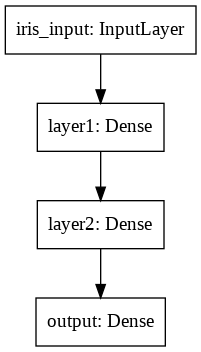

In [30]:
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

## Model with two inputs

<pre><b>Model with Two Inputs</b>
<pre> We are writing code to Build model as below 

<img src="https://i.imgur.com/xcSMxKN.png"></pre><pre><pre>

In [0]:
#clearing the graph of tensorflow
tf.keras.backend.clear_session()

# input to the model ( Input Layer 1 )
Input_model_1 = Input(shape=(4,),name="iris_input_1")

# layer 11
layer11 = Dense(units=32,activation='relu',kernel_initializer='he_normal',name="layer11")(Input_model_1)#we are giving output of input layer 1
#we got layer11 --> output of the first layer for first input


# input to the model ( Input Layer 2 )
Input_model_2 = Input(shape=(4,),name="iris_input_2")

# layer 12
layer12 = Dense(units=16,activation='sigmoid',kernel_initializer='glorot_uniform',name="layer12")(Input_model_2)#we are giving output of input layer 2
#we got layer12 --> output of the first layer for second input

# we got two outputs layer11,layer12
# concatenating those two outputs
concat_layer = concatenate(inputs=[layer11,layer12],name="concat")

# layer 2
layer2 = Dense(units=16,activation='relu',kernel_initializer='he_normal',name="layer2")(concat_layer)#we are giving output of concat layer
#we got layer2 --> output of the second layer

#output
output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",name="output")(layer2)#we are giving output of second layer

# till now we connected all the network from input to output. 
# Now we have to create a model for this you have to give what is the input layer and what is the output layer

model = Model(inputs=[Input_model_1,Input_model_2],outputs=output) # we specified the model input and output


In [32]:
#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
iris_input_1 (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
iris_input_2 (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
layer11 (Dense)                 (None, 32)           160         iris_input_1[0][0]               
__________________________________________________________________________________________________
layer12 (Dense)                 (None, 16)           80          iris_input_2[0][0]               
______________________________________________________________________________________________

In [0]:
#compile 
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
#train
model.fit([X_train,X_train],y_train_ohe,batch_size=16,epochs=5,validation_data=([X_test,X_test],y_test_ohe))

Train on 120 samples, validate on 30 samples
Epoch 1/5
120/120 [==============================] - 0s 1ms/sample - loss: 2.2365 - acc: 0.4000 - val_loss: 0.9057 - val_acc: 0.6000
Epoch 2/5
120/120 [==============================] - 0s 158us/sample - loss: 0.8797 - acc: 0.6667 - val_loss: 0.8965 - val_acc: 0.6667
Epoch 3/5
120/120 [==============================] - 0s 144us/sample - loss: 0.5388 - acc: 0.7917 - val_loss: 1.2253 - val_acc: 0.6667
Epoch 4/5
120/120 [==============================] - 0s 154us/sample - loss: 0.7698 - acc: 0.7333 - val_loss: 0.4612 - val_acc: 0.7000
Epoch 5/5
120/120 [==============================] - 0s 150us/sample - loss: 0.5420 - acc: 0.7417 - val_loss: 0.3035 - val_acc: 0.8667


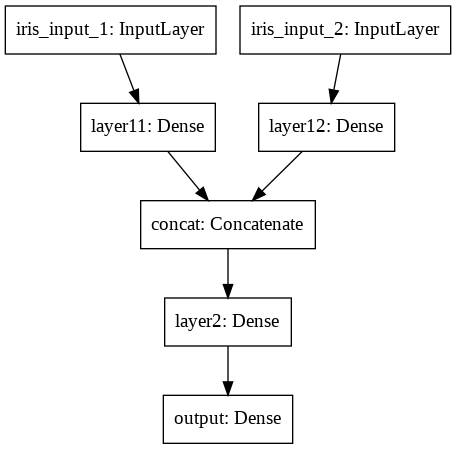

In [35]:
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)